<font color="maroon" size="6"><center><b>Multiple Linear Regression</b></center></font>
<font color="Royalblue" size="4"><center>Owner: Sushant Borade</center></font>
<font color="Royalblue" size="4"><center>Mail ID: sushant.9196@gmail.com</center></font>

In [1]:
import pandas as pd
import os as os
import numpy as np

#Visuals
import matplotlib.pyplot as plt
import seaborn as sns

# To split data
from sklearn.model_selection import train_test_split

# Models
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

# Evalution 
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings("ignore")

In [2]:
#Load the dataSet
filepath = r"F:\github\MLR"
filename = "MLR data.csv"

data = pd.read_csv(os.path.join(filepath, filename))

In [3]:
data.head() #Top 5 rows

,Unnamed: 0,Advertisement,Hiring,Patents,City,Net Income
0,0,165349.20,136897.80,471784.10,Mumbai,192261.83
1,1,162597.70,151377.59,443898.53,Bangalore,191792.06
2,2,153441.51,101145.55,407934.54,Pune,191050.39
3,3,144372.41,118671.85,383199.62,Mumbai,182901.99
4,4,142107.34,91391.77,366168.42,Pune,166187.94


In [4]:
data.tail() #Bottom 5 rows

,Unnamed: 0,Advertisement,Hiring,Patents,City,Net Income
45,45,1000.23,124153.04,1903.93,Mumbai,64926.08
46,46,1315.46,115816.21,297114.46,Pune,49490.75
47,47,0.00,135426.92,0.00,Bangalore,42559.73
48,48,542.05,51743.15,0.00,Mumbai,35673.41
49,49,0.00,116983.80,45173.06,Bangalore,14681.40


<font color = "Red" size="4"><b>Data Cleaning</b></font>

In [5]:
data.shape  #Find no or rows and columns

(50, 6)

In [6]:
data['Unnamed: 0'].nunique(),data.shape[0]

(50, 50)

<font size="3">We Can see that unique value in "Unnamed:0" column is same as that of no of rows, thus "Unnamed:0" column can just be consider as a row identifier So we can drop that column</font>

<Font color="Red" size="4"><b>Remove Unwanted Columns</b></Font>

In [7]:
data = data.drop(["Unnamed: 0"], axis = 1)
data.head()

,Advertisement,Hiring,Patents,City,Net Income
0,165349.20,136897.80,471784.10,Mumbai,192261.83
1,162597.70,151377.59,443898.53,Bangalore,191792.06
2,153441.51,101145.55,407934.54,Pune,191050.39
3,144372.41,118671.85,383199.62,Mumbai,182901.99
4,142107.34,91391.77,366168.42,Pune,166187.94


In [8]:
data.columns

Index(['Advertisement ', 'Hiring', 'Patents', 'City', 'Net Income'], dtype='object')

<font size="3"> There is space in "Advertisement" column name Thus remove that space by renaming the column name</font>

<font size="4" color="red"><b>Column Rename</b></font>

In [9]:
data = data.rename(columns = {'Advertisement ': 'Advertisement'})
data.columns

Index(['Advertisement', 'Hiring', 'Patents', 'City', 'Net Income'], dtype='object')

<font size="3">check for missing values</font>

In [10]:
data.isnull().sum()

Advertisement    0
Hiring           0
Patents          0
City             0
Net Income       0
dtype: int64

<font size="4" color="green"><b>Lets take Net Income first - as that is our output variable</b></font>

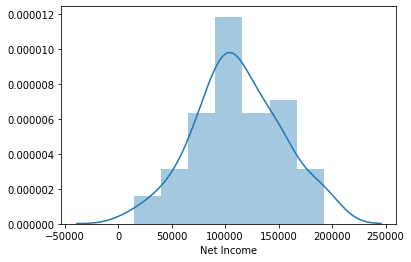

In [11]:
#Histogram
sns.distplot(data['Net Income'])

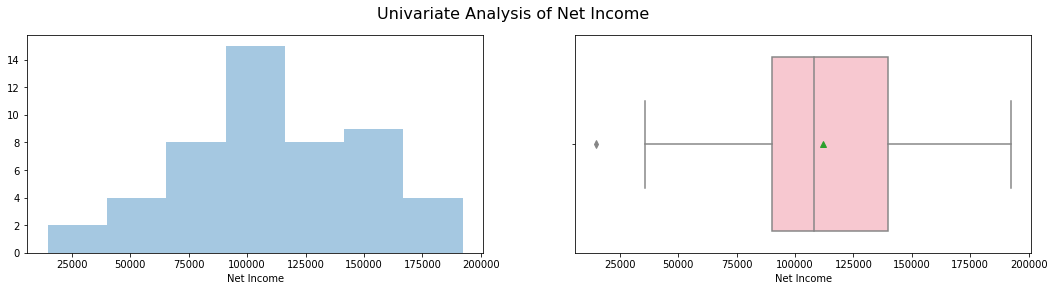

In [12]:
#Histogram and Box plot
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize=(18,4))
sns.distplot(data["Net Income"], ax=axes[0], kde = False)
sns.boxplot(data["Net Income"], ax=axes[1], orient = "h", showmeans = True, color = "pink")
fig.suptitle('Univariate Analysis of Net Income', fontsize=16)
plt.show()

<font size="3">There is a outlier below 25000 since it is the only outlier we can afford to drop that row</font>

In [13]:
data[data["Net Income"] < 25000]

,Advertisement,Hiring,Patents,City,Net Income
49,0.0,116983.8,45173.06,Bangalore,14681.4


<font color="red" size="4"><b>Remove Outlier</b></font>

In [14]:
data_1 = data[data["Net Income"] > 25000]  # 49 rows


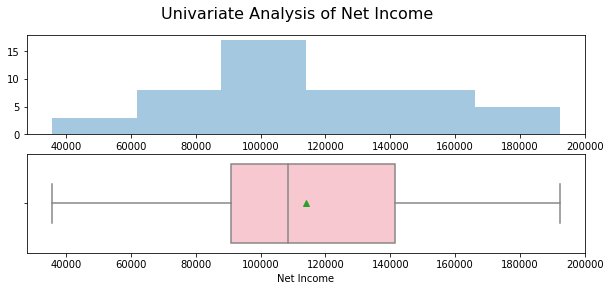

In [15]:
fig, axes = plt.subplots(2, 1, figsize=(10,4))
sns.distplot(data_1["Net Income"], ax=axes[0], kde = False)
sns.boxplot(data_1["Net Income"], ax=axes[1], orient = "h", showmeans = True, color = "pink")
fig.suptitle('Univariate Analysis of Net Income', fontsize=16)
plt.show()

<font size="4" color="blue"><b>Histogram And Box Plot For All Numerical Column</b></font>

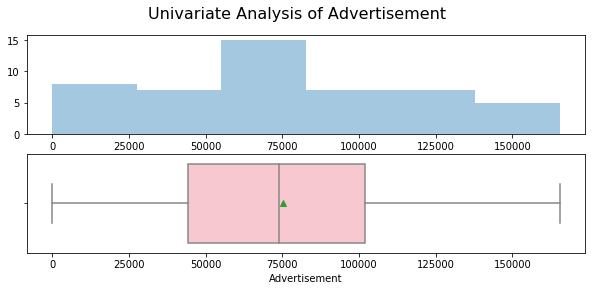

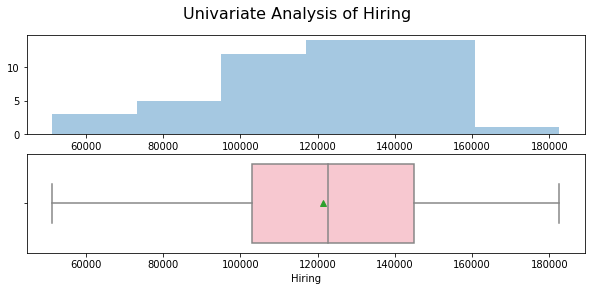

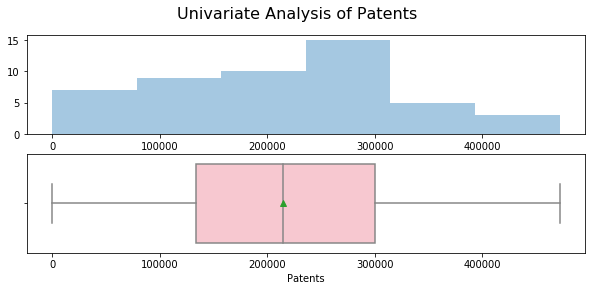

In [16]:
x_axis = ['Advertisement', 'Hiring', 'Patents']  # List
for x in x_axis:
    fig, axes = plt.subplots(2, 1, figsize=(10,4))
    sns.distplot(data_1[x], ax=axes[0], kde = False)
    sns.boxplot(data_1[x], ax=axes[1], orient = "h", showmeans = True, color = "pink")
    fig.suptitle('Univariate Analysis of ' + x, fontsize=16)

<font size="4"><b>Bi-Variate Analysis</b></font>
    
    Scatter Plot

In [17]:
def scatter_plot(x, y, in_data): 
    plt.scatter(in_data[x], in_data[y])
    plt.xlabel(x, fontsize = 13)
    plt.ylabel(y, fontsize = 13)
    plt.title("Scatter Plot of " + x + " & " + y, fontsize = 15)
    plt.grid()
    plt.show()

<font size="4" color="blue"><b>Scatter Plot For All Numerical Varaible</b></font>

In [18]:
x_axis = ['Advertisement', 'Hiring', 'Patents']
y_axis = "Net Income"

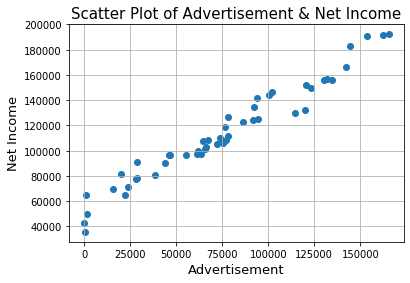

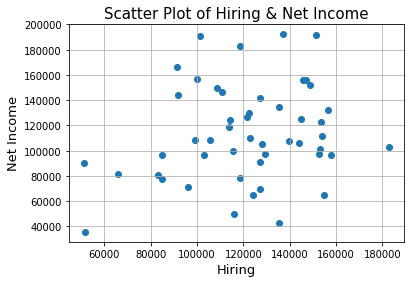

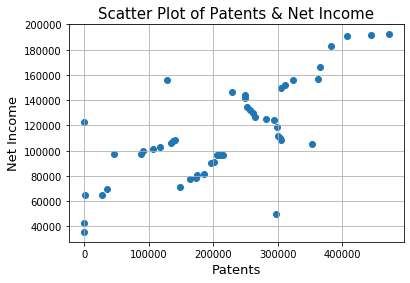

In [19]:
for col in x_axis:
    scatter_plot(x = col, y = y_axis, in_data = data_1)

<Font size="3"> From Above Analysis we can see that "Advertisement" feature is highly correlated with output feature that is Net Income, then Patents shows medium correlation and Hiring Shows the Least Correlation</font>

<font size="4" color="blue"><b>Regression Line in Scatter Plot</b></font>

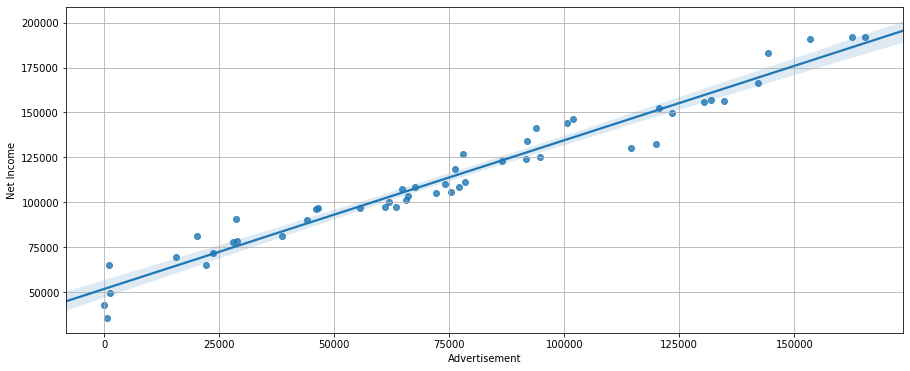

In [20]:
plt.figure(figsize = (15,6))
sns.regplot(x="Advertisement", y="Net Income", data=data_1)
plt.grid()
plt.show()

<font size="4" color="blue"><b>Correlation Using HeatMap</b></font>

In [21]:
def HeatMap(df):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(6,6))         # Sample figsize in inches
    sns.heatmap(corr,annot=True ,linewidths=.10,ax=ax,cmap='YlGnBu')
    bottom, top = ax.get_ylim()
    #print("Bottom is ",bottom,"After adding",bottom+0.5)
    #print("TOp is ",top,"After adding",top-0.5)
    ax.set_ylim(bottom + 0.5, top - 0.5)

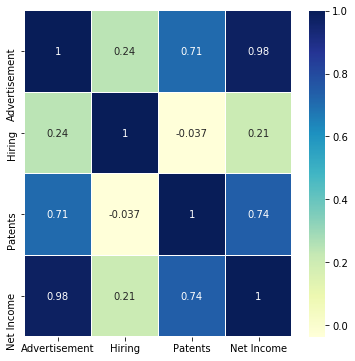

In [22]:
HeatMap(data_1)

<Font size="4" color="Red"><b>Collinearity</b></font> 

<font size="3">There should be good correlation between input feature and output feature. In Our Case we can see that "Hiring" and "Net Income" has correlation of abount 0.21 which is very low. Thus Hiring does not contribute to NetIncome Thus it is good that we do not use Hiring while building model</font>

<Font size="4" color="Red"><b>Multicollinearity<b></font>

<font size="3"> Above Heatmap shows that there is high correlation between "Advertisement" and "Patents" Thus to we should Avoid Multicollinearity So we will drop one Column while Building Model. Drop the feature which has less correlation with output variable i.e Patents</Font>

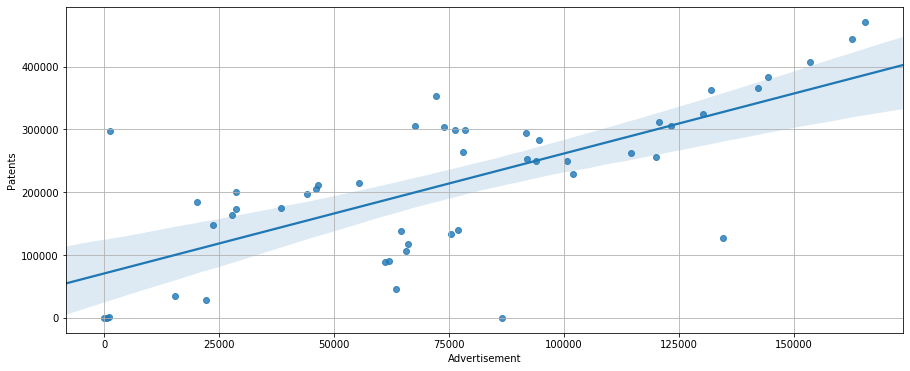

In [23]:
plt.figure(figsize = (15,6))
sns.regplot(x="Advertisement", y="Patents", data=data_1)    # Xs there is High correlation 
plt.grid()
plt.show()

<Font size="4" color="green"><b> Lets Start Analyzing Categorical Feature i.e City</b> </font>

<Font color="blue" size="4"><b>Anova Test: To check for mean Difference between groups is significant or not !!
</b></font>

 * Null Hypothesis = No difference in group Mean
 * Alternate Hypothesis = Difference in group Mean

In [24]:
anova_df = data_1.copy()

In [25]:
import scipy.stats as stats

In [26]:
fvalue, pvalue = stats.f_oneway(anova_df[anova_df["City"] == "Mumbai"]["Net Income"], 
                               anova_df[anova_df["City"] == "Bangalore"]["Net Income"],
                               anova_df[anova_df["City"] == "Pune"]["Net Income"])

In [27]:
fvalue, pvalue

(0.22995265333290962, 0.7954790782412292)

In [28]:
if (pvalue <= 0.05):
    print ("Reject Ho: There is difference")
else:
    print ("Accept Ho: Opss !! no difference")

Accept Ho: Opss !! no difference


<font size="3"> We Can also check mean of all group using Box plot </font>

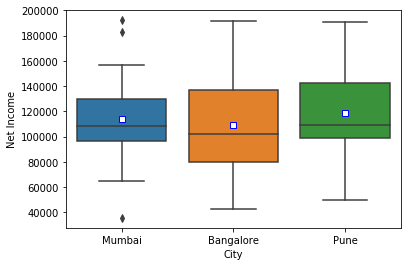

In [29]:
sns.boxplot(x = "City", y = "Net Income", showmeans=True,data = data_1,meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"blue"})

<font size="3"> Thus From Box Plot also we can see that "white Square" of all the groups are somewhat same i.e mean of all group is same</font>

<font color="green" size="4"><b>Then To If you want to  consider City Feature convert them to dummies and then concat as shown below, but In my model I am not using City feature</b></font>

In [30]:
dummies_df = pd.get_dummies(data_1["City"], drop_first=True)
dummies_df.head()

,Mumbai,Pune
0,1,0
1,0,0
2,0,1
3,1,0
4,0,1


In [31]:
#Merge the dummies column and remove the original city column
data_1.drop(['City'],axis=1,inplace=True)


In [32]:
data_1 = pd.merge(data_1, dummies_df, left_index = True, right_index = True) 
data_1.head()

,Advertisement,Hiring,Patents,Net Income,Mumbai,Pune
0,165349.20,136897.80,471784.10,192261.83,1,0
1,162597.70,151377.59,443898.53,191792.06,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1
3,144372.41,118671.85,383199.62,182901.99,1,0
4,142107.34,91391.77,366168.42,166187.94,0,1


In [33]:
data_1.head()

,Advertisement,Hiring,Patents,Net Income,Mumbai,Pune
0,165349.20,136897.80,471784.10,192261.83,1,0
1,162597.70,151377.59,443898.53,191792.06,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1
3,144372.41,118671.85,383199.62,182901.99,1,0
4,142107.34,91391.77,366168.42,166187.94,0,1


<font color="green" size="4"><b>Let's Build an OLS Model</b></font>
    
    OLS(Ordinary Least Square)
    OLS finds the Best Fit line Which gives minimum SSE

In [34]:
X = data_1[["Advertisement"]]    # Input data  (Hiring and patents is not useful for predicting)
y = data_1[["Net Income"]] 

<font size="4"><b>Train Test Split</b></font>
    
    Model will be build on train data only

In [35]:
# Split the data for train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y , train_size = 0.8, random_state = 21)   # 70-30 Split

In [36]:
X_train.shape , y_train.shape    # Check dimension of train data 

((39, 1), (39, 1))

In [37]:
X_test.shape, y_test.shape       # Check dimension of test data

((10, 1), (10, 1))

<font size="4"><b>Lets build model using Train Data</b></font>

In [38]:
X_train_1 = sm.add_constant(X_train)    # Adds Intercept 

lm = sm.OLS(y_train, X_train_1)       # Creates function
lm = lm.fit()                      # Get best fit line output

In [39]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Net Income   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     789.5
Date:                Fri, 02 Oct 2020   Prob (F-statistic):           1.47e-26
Time:                        16:49:00   Log-Likelihood:                -405.06
No. Observations:                  39   AIC:                             814.1
Df Residuals:                      37   BIC:                             817.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          5.181e+04   2583.567     20.055      0.000    4.66e+04     5.7e+04
Advertisement     0.8309      0.030     28.099      0.000       0.771       0.891
==============================================================================
Omnibus:                        0.457   Durbin-Watson:                   1.663
Prob(Omnibus):                  0.796   Jarque-Bera (JB):                0.583
Skew:                           0.029   Prob(JB):                        0.747
Kurtosis:                       2.404   Cond. No.                     1.75e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.75e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<font size="4"><b>Lets test our trained model on test data</b></font>

In [40]:
X_test_1 = sm.add_constant(X_test)    # Adds Intercept 

# Predicting the Salary for the Test values
y_pred = lm.predict(X_test_1)
y_pred

7     160073.468453
43     64697.272110
42     71456.468995
25    105541.409253
14    151470.024133
2     179302.333386
23    107924.160754
30    103322.827005
17    130460.879531
46     52907.171218
dtype: float64

<font color="Red" size="4"><b>Visualization of best fit line </b></font>

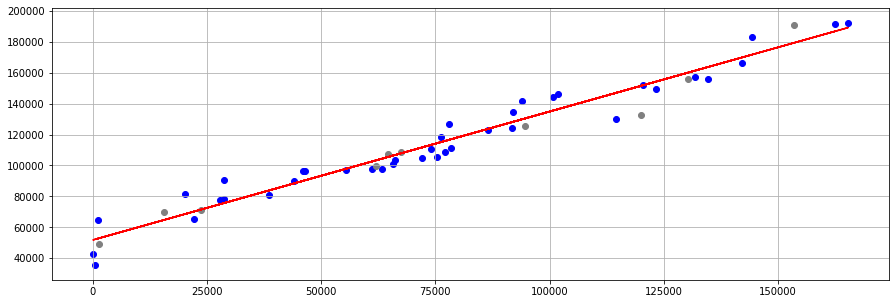

In [41]:
plt.figure(figsize = (15,5))
plt.plot(X_train["Advertisement"], lm.predict(X_train_1),  color='red')  # beacuse it have only  Train data - Regression line (eq can also be used)
plt.scatter(X_train["Advertisement"], y_train,  color='blue')
plt.scatter(X_test["Advertisement"], y_test,  color='grey')
#plt.scatter(X_test, lm.predict(X_test_1),  color='black')    # y_pred = lm.predict(test)  -- Test  data 
plt.grid()
plt.show()

<font size="4" color="blue"><b>Error Distribution</b></font>

    We will look into error distribution
    x-axis will be index and y-axis will be error

In [42]:
errors_train = y_train["Net Income"] - lm.predict(X_train_1)    # Actuals - Predicted = Errors
errors_test = y_test["Net Income"] - lm.predict(X_test_1)

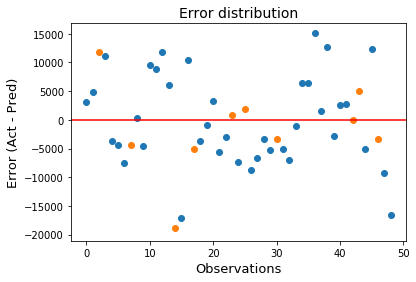

In [43]:
plt.scatter(y_train.index, errors_train)   # y_train.index & X_train.index is same
plt.scatter(y_test.index, errors_test)
plt.xlabel("Observations", fontsize = 13)
plt.ylabel("Error (Act - Pred)",  fontsize = 13)
plt.title("Error distribution",  fontsize = 14)
plt.axhline(0, color = "red")
plt.show()

<font size="3">Error Should be close to 0</font>

<font size="4" color="Red"><b>Error Evaluation Metrics</b></font>

In [44]:
## Importing metrics for the evaluation of the model
from sklearn.metrics import r2_score, mean_squared_error

In [45]:
# calculate Mean square error
mse = mean_squared_error(y_test,y_pred)    # to be only of test data 
rmse = np.sqrt(mse)
rmse

7690.634452305524

In [46]:
# Calculate R square vale
rsq = r2_score(y_test,y_pred)    # On test data (In summary output its on train data)
rsq

0.9636446213534289

<font size="4" color="green"><b>Conclusing Statement</b></font>

   We can conclude that around 96% of SST can be explained by using this regression equation to predict Net Income on test data.  
   The remainder is error